#  Preyecto integrador Grupo 1

##  Modelo predictivo de conversiones Banco Galicia

##  1. Introducción

El banco Galicia junto a la consultora OMBU especializada en ciencias de datos crearon un desafío al público para la descubrir oportunidades de crecimiento en su negocio a partir del análisis de datos de navegación web de sus usuarios.

El obejtivo del desafío es desarrollar un modelo predictivo de conversión en base al comportamiento digital de los clientes.<br>
<br>
El termino **conversión** hace referencia a la acción de interés esperada por la compañía, no se específica qué acción específicamente es la que interesa por políticas de preservación de la privacidad de los usuarios.

El desafío tiene lugar entre el 15 de julio y el 15 de septiembre de 2019, anunciándose los ganadores el 26 de septiembre.

Los premios constan de:<br>
<ul>
    <li> USD 5000 1º PUESTO</li>
    <li> USD 3000 2º PUESTO</li>
    <li> USD 2000 3º PUESTO</li>
    <li> PREMIOS ACADÉMICOS 4º PUESTO</li>
</ul>

El desafío se lleva a cabo por medio de la platafroma Kaggle [Datatón Banco Galicia 2019](https://www.kaggle.com/c/banco-galicia-dataton-2019)
<br>
<br>
En esta plataforma se encuentran disponibles los datasets utilizados en este deafío.

### 1.1 Descripción de los datos

El set de entrenamiento cuenta con informaciones históricas reales y anonimizadas con el flujo de navegación de los clientes, junto con datos técnicos de los dispositivos utilizados. Además, se brindará información sobre cuales realizaron una conversión positiva, a fin de utilizarla como variable dependiente de entrenamiento del modelo predictivo.
<br>
<br>
Luego, se debe predecir las conversiones para el primer trimestre del 2019, indicando los clientes que se considera que van a convertir y sobre los que será evaluado su modelo.

El conjunto de datos consta de tres datasets:
<ul>
<li>pageviews.csv - Los datos de navegación de 2018</li>
    <ul>
    <li>USER_ID - Id del usuario</li>
    <li>FEC_EVENT - Fecha</li>
    <li>PAGE - código de la página</li>
    <li>CONTENT_CATEGORY - Categoría de la pagina</li>
    <li>CONTENT_CATEGORY_TOP - Categoría de mas alto rango para la pagina</li>
    <li>CONTENT_CATEGORY_BOTTOM - Categoría de mas bajo rango para la pagina</li>
    <li>SITE_ID - Id del sitio visitado</li>
    <li>ON_SITE_SEARCH_TERM - Palabra clave buscada</li>
    </ul>
<li>device_data.csv - Datos de los dispositivos asociados a los usuarios</li>
    <ul>
    <li>USER_ID - Id del usuario</li>
    <li>FEC_EVENT - Fecha</li>
    <li>CONNECTION_SPEED - Categoría de conexión</li>
    <li>IS_MOBILE_DEVICE - Categoría de si es telefono móvil o no</li>
    </ul>
<li>sampleSubmission.csv - un ejemplo de entrega correcta</li>

###  1.2 Evaluación

La **métrica** de evaluación para las soluciones es el área bajo la curva ROC, de mayor a menor.
<br>
<br>
Para cada cliente en el dataset de navegación (pageviews.csv) se debe crear una columna (index) de **USER_ID** con el número de usuario (0 - 11676) y otra de **SCORE** correspondiente a la probabilidad de conversión para el primer trimestre de 2019.

## 2. Desarrollo

###  2.1 Importación de librerías y datasets

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [5]:
# El pageviews_complemento.csv se subió a posteriori de comenzado el desafío. Agrega datos con el mismo formato tabular
page_views=pd.concat([pd.read_csv("pageviews.csv",parse_dates=["FEC_EVENT"]),
                      pd.read_csv("pageviews_complemento.csv",parse_dates=["FEC_EVENT"])])

C:\Users\yago9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# Información del dispositivo utilizado en la navegación web
device_data=pd.read_csv("device_data.csv",parse_dates=["FEC_EVENT"])

In [7]:
conv=pd.read_csv("conversiones.csv")

###  2.2 Exploración incial

In [8]:
print(page_views.shape)
print(device_data.shape)
print(conv.shape)

(22870354, 8)
(2871406, 4)
(1738, 3)


In [9]:
#Información de la navegación WEB que hizo cada usuario
page_views.sample(3)

,CONTENT_CATEGORY,CONTENT_CATEGORY_BOTTOM,CONTENT_CATEGORY_TOP,FEC_EVENT,ON_SITE_SEARCH_TERM,PAGE,SITE_ID,USER_ID
4762984,2,2,2,2018-03-12 10:42:38,1,3,3,10715
5310338,2,2,2,2018-05-17 12:18:28,1,3,3,781
397587,2,2,2,2018-03-16 22:37:13,1,5,2,778
16355416,2,2,2,2018-07-10 11:16:04,1,182,3,2291
7125010,2,2,2,2018-06-28 14:29:23,1,191,3,4505


In [10]:
#Fecha de conversion de cada usuario
conv.sample(5)

,mes,anio,USER_ID
1304,9.0,2018.0,4178.0
1407,6.0,2018.0,6501.0
236,4.0,2018.0,1239.0
1531,8.0,2018.0,5739.0
1017,9.0,2018.0,9407.0


In [11]:
# Datos del dispositivo móvil usado para los logs
device_data.sample(5)

,FEC_EVENT,CONNECTION_SPEED,IS_MOBILE_DEVICE,USER_ID
276716,2018-05-10 08:15:14,3,0,1014.0
2147184,2018-04-18 09:53:18,3,1,8298.0
1477058,2018-05-04 12:58:21,1,1,5936.0
394888,2018-06-07 14:01:30,3,1,1482.0
1052967,2018-08-07 14:13:46,3,1,4123.0


In [12]:
page_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870354 entries, 0 to 4933419
Data columns (total 8 columns):
CONTENT_CATEGORY           int64
CONTENT_CATEGORY_BOTTOM    int64
CONTENT_CATEGORY_TOP       int64
FEC_EVENT                  datetime64[ns]
ON_SITE_SEARCH_TERM        int64
PAGE                       int64
SITE_ID                    int64
USER_ID                    int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.5 GB


In [13]:
page_views.isnull().sum()

CONTENT_CATEGORY           0
CONTENT_CATEGORY_BOTTOM    0
CONTENT_CATEGORY_TOP       0
FEC_EVENT                  0
ON_SITE_SEARCH_TERM        0
PAGE                       0
SITE_ID                    0
USER_ID                    0
dtype: int64

In [14]:
device_data.isnull().sum()

FEC_EVENT           0
CONNECTION_SPEED    0
IS_MOBILE_DEVICE    0
USER_ID             0
dtype: int64

In [15]:
conv.isnull().sum()

mes        0
anio       0
USER_ID    0
dtype: int64

In [16]:
# Conversión del USER_ID de float a int
device_data.USER_ID = device_data.USER_ID.astype(int)

In [17]:
#Para ver si todos los datos son de 2018
print(conv.anio.value_counts())
print(conv.mes.value_counts())

2018.0    1738
Name: anio, dtype: int64
8.0     213
10.0    210
6.0     196
11.0    184
9.0     171
4.0     165
2.0     139
12.0    115
5.0     105
7.0     102
1.0      89
3.0      49
Name: mes, dtype: int64


In [18]:
# Porcentaje de lineas que no tienen las tres lineas de categoria iguales
cat_dif=page_views[page_views["CONTENT_CATEGORY"]!=page_views["CONTENT_CATEGORY_TOP"]&page_views["CONTENT_CATEGORY_BOTTOM"]].shape
cat_dif=cat_dif[0]
print("Porcentaje de registros que tienen las tres Category iguales: {0:.3f}".format(cat_dif/page_views.shape[0]))

Porcentaje de registros que tienen las tres Category iguales: 0.096


In [19]:
# Cantidad de distintos usuarios = cantidad de líneas que tiene que tener el set de predicciones
len(page_views.USER_ID.unique())

11676

In [20]:
# Desbalanceo de clases en SITE_ID
page_views.SITE_ID.value_counts(normalize=True)

3    0.636914
2    0.279485
1    0.083067
4    0.000534
Name: SITE_ID, dtype: float64

####  2.2.1 Gráficos

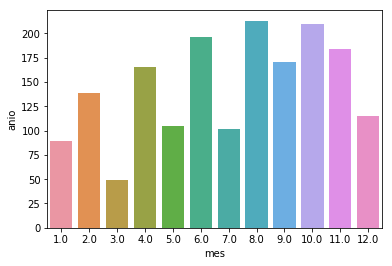

In [21]:
# Conversiones mensuales
conv_mensual=conv[["mes","anio"]].groupby("mes").count()
sns.barplot(conv_mensual.index,conv_mensual.iloc[:,0])

In [ ]:
sns.barplot(page_views.FEC_EVENT.dt.month,page_views.FEC_EVENT.dt.month.value_counts())

In [154]:
for x in device_data.columns:
    print(x,len(device_data[x].unique()))

FEC_EVENT 2592597
CONNECTION_SPEED 4
IS_MOBILE_DEVICE 2
USER_ID 11676


In [155]:
page_corr=page_views.corr()

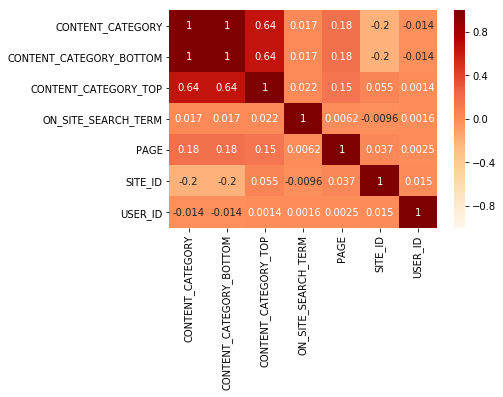

In [161]:
sns.heatmap(page_corr,vmin=-1,vmax=1,annot=True,cmap="OrRd")

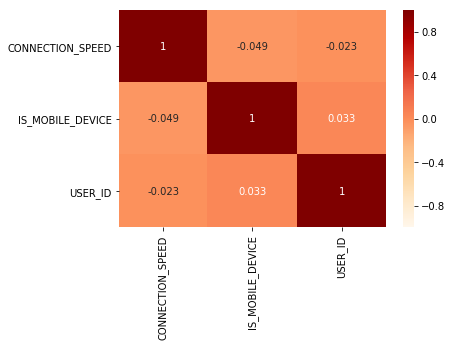

In [162]:
sns.heatmap(device_data.corr(),vmin=-1,vmax=1,annot=True,cmap="OrRd")

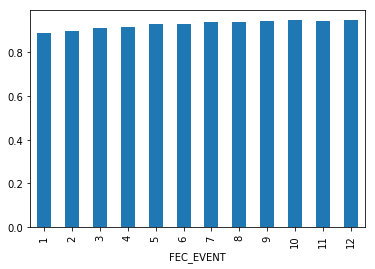

In [179]:
(page_views.groupby(page_views.FEC_EVENT.dt.month).USER_ID.nunique() / page_views.USER_ID.nunique()).plot(kind="bar")
plt.show()

###  2.3 Procesamiento de datos

Lo primero que se debe hacer es cambiar la unidad observacional, en los dataset brindados esta es cada ingreso a una página web realizada por el usuario, ordenada cronológicamente.
<br>
<br>
Para poder cumplir con el objetivo es necesario agrupar todos los ingresos por usuario, obteniendo un set de entrenamiento de 11677 filas (una para cada usuario).

####  2.3.1 Navegación web

In [45]:
# Creación de df con la proporción de cada página sobre el total de ingresos teniendo en cuenta el mes de corte para la creación del set
def web_info(test_month):
    df=page_views[page_views["FEC_EVENT"].dt.month<test_month]
    X=[]
    for x in df.drop(["FEC_EVENT","USER_ID"],axis=1).columns:
        print("Haciendo",x)
        tab=pd.crosstab(df.USER_ID,df[x])
        tab.columns=((str(x) + "_" + str(c)) for c in tab.columns)
        X.append(tab.apply(lambda x: x/x.sum(),axis=1))
    X = pd.concat(X, axis=1)
    return X

In [24]:
X_prueba = web_info(13)

Haciendo CONTENT_CATEGORY
Haciendo CONTENT_CATEGORY_BOTTOM
Haciendo CONTENT_CATEGORY_TOP
Haciendo ON_SITE_SEARCH_TERM
Haciendo PAGE
Haciendo SITE_ID


In [25]:
# Verificación de que page_views tiene 6 columnas
len(page_views.drop(["FEC_EVENT","USER_ID"],axis=1).columns)

6

In [26]:
# Debería ser igual a 6 dado que la información de cada columna se desglosa en la proporción de ingreso a cada página
# Sumadas las proporciones debe dar uno para cada feature categorica
X_prueba.iloc[0,:].sum()

6.0

In [27]:
X_prueba.head(3)

,CONTENT_CATEGORY_1,CONTENT_CATEGORY_2,CONTENT_CATEGORY_3,CONTENT_CATEGORY_4,CONTENT_CATEGORY_5,CONTENT_CATEGORY_6,CONTENT_CATEGORY_7,CONTENT_CATEGORY_8,CONTENT_CATEGORY_9,CONTENT_CATEGORY_10,...,PAGE_1830,PAGE_1831,PAGE_1832,PAGE_1833,PAGE_1834,PAGE_1835,SITE_ID_1,SITE_ID_2,SITE_ID_3,SITE_ID_4
USER_ID,,,,,,,,,,,,,,,,,,,,,
0,0.028767,0.478153,0.000155,0.486705,0.003732,0.001399,0.000466,0.000155,0.000155,0.000155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031410,0.635982,0.332608,0.0
1,0.105637,0.389863,0.002369,0.495500,0.000947,0.001421,0.000000,0.000000,0.000000,0.000474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.113690,0.660351,0.225959,0.0
2,0.097973,0.705236,0.000422,0.119088,0.005912,0.004223,0.002111,0.001267,0.002111,0.004645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.169764,0.320946,0.509291,0.0


In [28]:
X_prueba.shape

(11676, 2174)

#### 2.3.2 Información del dispositivo de navegación

In [30]:
# Función que toma un mes de corte y calcula la velocidad de navegación y el porcentaje de ingresos con dispositivo móvil
def dev_data(test_month):
    data=device_data[device_data["FEC_EVENT"].dt.month<test_month]
    data=data[["CONNECTION_SPEED","IS_MOBILE_DEVICE","USER_ID"]].groupby("USER_ID").mean()
    return data

In [29]:
#Función que toma el mes de corte y realiza el mismo proceso que para page_views
def dev_data_2(test_month):
    df=device_data[device_data["FEC_EVENT"].dt.month<test_month]
    X=[]
    for x in df.drop(["FEC_EVENT","USER_ID"],axis=1).columns:
        print("Haciendo",x)
        tab=pd.crosstab(df.USER_ID,df[x])
        tab.columns=((str(x) + "_" + str(c)) for c in tab.columns)
        X.append(tab.apply(lambda x: x/x.sum(),axis=1))
    X = pd.concat(X, axis=1)
    return X

####  2.3.3 Conversiones pasadas

Identificar la cantidad de veces que el usuario convirtió en el período estudiado. Entendemos que un síntoma de lealtad hacia el banco es la cantidad de conversiones del cliente.

In [31]:
# Función que agrupa y cuenta la cantidad de conversiones de un usuario en el periodo establecido
def conv_user(test_month):
    data=conv.loc[conv["mes"]<train_month,["mes","USER_ID"]].groupby("USER_ID").count().sort_values("mes",ascending=False)
    return data

###  2.4 Creación y división del set

Dado que es necesaria la predicción tres meses hacia el futuro, el modelo a entrenar debe validar sus conclusiones a partir de datos tres meses en el futuro. Para esto, los sets que se utilizazán serán:
<ul>
    <li>Train: Datos de navegación entre el mes de enero y septiembre de 2018 inclusive</li>
    <li>Test: Datos de conversión de los meses de octubre, noviembre y diciembre de 2018</li>
    <li>Predicción/producción: Datos de navegación entre el mes de enero y diciembre de 2018</li>
</ul>

In [32]:
train_month=10 #Número de mes de corte sin incluir en el train set (10=octubre)
test_month=13 #Número de mes de corte para el test_set (incluye todos los meses dado que 13>12=diciembre)

In [33]:
X_test=web_info(test_month)
X_test=X_test.join(dev_data(test_month))
X_test=X_test.join(conv_user(test_month))
X_test=X_test.join(dev_data_2(test_month))
X_test.loc[:,"mes"].fillna(0,inplace=True) #Se completa con cero el campo de cantidad de conversiones para los 

Haciendo CONTENT_CATEGORY
Haciendo CONTENT_CATEGORY_BOTTOM
Haciendo CONTENT_CATEGORY_TOP
Haciendo ON_SITE_SEARCH_TERM
Haciendo PAGE
Haciendo SITE_ID
Haciendo CONNECTION_SPEED
Haciendo IS_MOBILE_DEVICE


In [34]:
X_train=web_info(train_month)
X_train=X_train.join(dev_data(train_month),on=X_train.index)
X_train=X_train.join(conv_user(train_month),on=X_train.index)
X_train=X_train.join(dev_data_2(train_month),on=X_train.index)
X_train.loc[:,"mes"].fillna(0,inplace=True)

Haciendo CONTENT_CATEGORY
Haciendo CONTENT_CATEGORY_BOTTOM
Haciendo CONTENT_CATEGORY_TOP
Haciendo ON_SITE_SEARCH_TERM
Haciendo PAGE
Haciendo SITE_ID
Haciendo CONNECTION_SPEED
Haciendo IS_MOBILE_DEVICE


In [35]:
# X_train=X_train.join(conv_users_train,on=X_train.index)
# X_train.iloc[:,-1].fillna(0,inplace=True)

In [36]:
# X_test=X_test.join(conv_users_test,on=X_test.index)
# X_test.iloc[:,-1].fillna(0,inplace=True)

In [37]:
X_train.sample(5)

,CONTENT_CATEGORY_1,CONTENT_CATEGORY_2,CONTENT_CATEGORY_3,CONTENT_CATEGORY_4,CONTENT_CATEGORY_5,CONTENT_CATEGORY_6,CONTENT_CATEGORY_7,CONTENT_CATEGORY_8,CONTENT_CATEGORY_9,CONTENT_CATEGORY_10,...,SITE_ID_4,CONNECTION_SPEED,IS_MOBILE_DEVICE,mes,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1
USER_ID,,,,,,,,,,,,,,,,,,,,,
912,0.019886,0.902273,0.0,0.043750,0.000568,0.032386,0.0,0.0,0.000000,0.00000,...,0.000000,0.489655,0.896552,0.0,0.600000,0.344828,0.020690,0.034483,0.103448,0.896552
11057,0.010417,0.940972,0.0,0.000000,0.000000,0.013889,0.0,0.0,0.000000,0.00000,...,0.000000,1.083333,0.888889,0.0,0.000000,0.944444,0.027778,0.027778,0.111111,0.888889
3493,0.173222,0.779916,0.0,0.035146,0.002510,0.001674,0.0,0.0,0.000000,0.00251,...,0.000000,1.896296,0.792593,1.0,0.000000,0.496296,0.111111,0.392593,0.207407,0.792593
9138,0.113413,0.794984,0.0,0.080698,0.002181,0.004362,0.0,0.0,0.003272,0.00000,...,0.000000,1.482014,0.942446,0.0,0.007194,0.748201,0.000000,0.244604,0.057554,0.942446
5524,0.015873,0.876984,0.0,0.043651,0.000000,0.007937,0.0,0.0,0.000000,0.00000,...,0.003968,1.192308,0.961538,0.0,0.000000,0.884615,0.038462,0.076923,0.038462,0.961538


In [38]:
X_train.shape

(11529, 2035)

In [39]:
X_test.shape

(11676, 2183)

In [40]:
# Nos quedamos con las features que se encuentran en ambos sets
features = list(set(X_train.columns).intersection(set(X_test.columns)))
X_train = X_train[features]
X_test = X_test[features]

In [41]:
X_train.isnull().sum().sum()
X_test.isnull().sum().sum()

0

In [43]:
# Creamos la serie con la variable categórica objetivo poniendo el valor 1 a los usuario con conversiones posteriores a 09/2018
y_prev = conv
y_train = pd.Series(0, index=X_train.index)
idx = set(y_prev[y_prev.mes >= 10].USER_ID.unique()).intersection(
        set(X_train.index))
y_train.loc[list(idx)] = 1

In [164]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(11528, 2035)
(11528,)
(11676, 2035)


In [50]:
# from sklearn.model_selection import train_test_split
# Xtr,Xt,ytr,yt=train_test_split(X_train,y_train,random_state=1,stratify=y_train)

In [51]:
# print(Xtr.shape)
# print(Xt.shape)
# print(ytr.shape)
# print(yt.shape)

###  2.4. Selección de features

In [52]:
X_train.var().sort_values()

PAGE_1431                     3.466913e-13
ON_SITE_SEARCH_TERM_186       4.930569e-13
ON_SITE_SEARCH_TERM_185       4.930569e-13
PAGE_1417                     6.544388e-13
PAGE_1418                     6.544388e-13
PAGE_1619                     8.380358e-13
ON_SITE_SEARCH_TERM_280       8.870361e-13
ON_SITE_SEARCH_TERM_156       1.217470e-12
ON_SITE_SEARCH_TERM_61        1.351001e-12
ON_SITE_SEARCH_TERM_60        1.351001e-12
ON_SITE_SEARCH_TERM_62        1.351001e-12
PAGE_917                      1.351001e-12
PAGE_1457                     1.374572e-12
PAGE_1213                     1.374572e-12
PAGE_1410                     1.625570e-12
PAGE_1606                     1.856273e-12
PAGE_1602                     1.856273e-12
ON_SITE_SEARCH_TERM_42        1.857904e-12
PAGE_1393                     1.903311e-12
PAGE_1152                     1.903311e-12
PAGE_1395                     1.903311e-12
PAGE_1397                     1.903311e-12
PAGE_1401                     1.903311e-12
PAGE_1696  

### 2.5 Prueba de modelos

Utilizamos distintos algorítmos de clasificación para resolver el problema, así como para también realizar comparaciones entre el rendimiento de los distintos modelos.
<br>
<br>
Los modelos utilizados fueron:
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>XGboost</li>
    <li>LightGBM</li>
    <li>CatBoost</li>
</ul>


La **evaluación** de los modelos se hizo a partir del área debajo de la curva ROC, igual que el sistema de evalaución del desafío en Kaggle.

In [130]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler
from scipy import interp
from sklearn.linear_model import LogisticRegression

Creamos una función que toma un modelo previamente determinado y lo entrena 5 veces realizando un Stratified split de los sets de entrenamiento y testeo. Luego promedia el valor obtenido en el predict_proba de los sets de testeo y de predicción para el primer trimestre de 2019.
<br>
<br>
También devuelve métricas para la relización del gráfico de la curva roc.

In [54]:
mean_fpr = np.linspace(0,1,100)

In [55]:
def model_(model):
    probs=[]
    pred_test=[]
    tprs=[]
    aucs = []
    auc_score=[]
    i=0
    p=0
    for train_idx,test_idx in StratifiedKFold(n_splits=5,shuffle=True).split(X_train,y_train):
        i+=1
        print("Haciendo fold: ",i)
        Xtr = X_train.iloc[train_idx]
        ytr = y_train.loc[X_train.index].iloc[train_idx]

        Xt = X_train.iloc[test_idx]
        yt = y_train.loc[X_train.index].iloc[test_idx]

        model.fit(Xtr,ytr)
        p+=1
        print("Fit terminado fold: ",p)
        predp_Xt=model.predict_proba(Xt)
        predp_Xtest=model.predict_proba(X_test)
        pred_test.append(pd.Series(predp_Xt[:,-1]))
        probs.append(pd.Series(predp_Xtest[:,-1],index=X_test.index))
        auc_score.append(roc_auc_score(yt, predp_Xt[:,-1]))
        
        fpr, tpr, t = roc_curve(yt, predp_Xt[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    pred_test = pd.concat(pred_test, axis=1).mean(axis=1)
    probs = pd.concat(probs, axis=1).mean(axis=1)
    auc_score = np.mean(auc_score)
    return pred_test,probs,auc_score,tprs

In [56]:
# Toma las métricas obtenidas del entrenamiento/testeo del modelo y grafica la curva roc media para del modelo.
def plot_roc(inter,model_name):
    fig1 = plt.figure(figsize=[8,8])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(inter, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(str(model_name)+' ROC')
    plt.legend(loc="lower right")

#### 2.5.1 Logistic Regression. Benchmark

In [131]:
Log_reg=LogisticRegression()

In [137]:
yt_pred_lr,probs_lr,auc_lr,inter_lr=model_(Log_reg)

Haciendo fold:  1


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fit terminado fold:  1
Haciendo fold:  2


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fit terminado fold:  2
Haciendo fold:  3


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fit terminado fold:  3
Haciendo fold:  4


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fit terminado fold:  4
Haciendo fold:  5


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fit terminado fold:  5


In [138]:
print("Valor AUC: ",auc_lr)

Valor AUC:  0.7672056693437228


#### 2.5.2 Random Forest

#####  Sin optmizar hiperparámetros

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model_rf = RandomForestClassifier()

In [71]:
yt_pred_rf,probs_rf,auc_rf,inter =model_(model_rf)

Haciendo fold:  1


C:\Users\yago9\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [72]:
print("Valor AUC: ",auc_rf)

Valor AUC:  0.6910086834047727


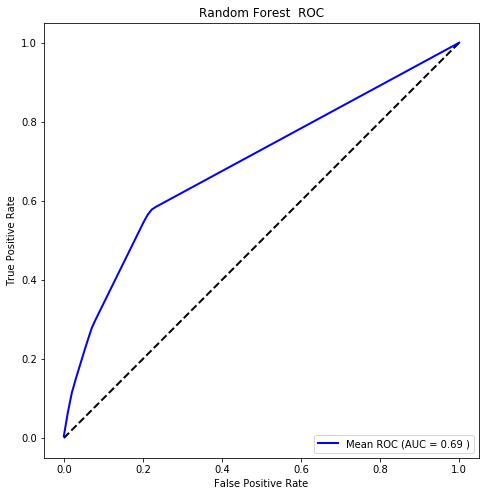

In [73]:
plot_roc(inter,"Random Forest ")

#####  RF con optimización de hiperparámetros

In [57]:
import scipy.stats as st

In [58]:
params = {  
   "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [62]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True, cv=5)

In [63]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [64]:
rf_opt=rf.best_estimator_

In [167]:
rf_opt

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# rf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=8, max_features='auto', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=31,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

In [67]:
yt_pred_rfopt,probs_rfopt,auc_rfopt,inter_rfopt=model_(rf_opt)

Haciendo fold:  1
Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [74]:
print("Valor AUC: ",auc_rfopt)

Valor AUC:  0.8329270960254931


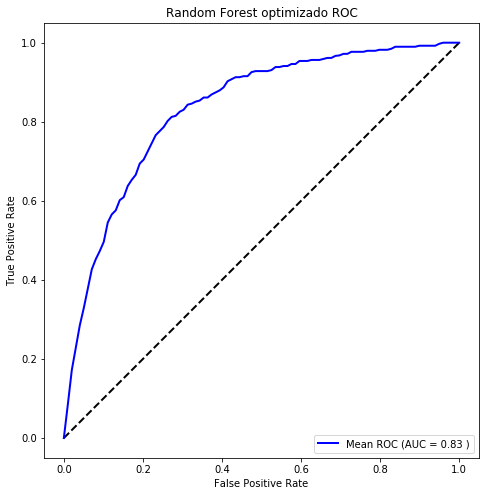

In [76]:
plot_roc(inter_rfopt,"Random Forest optimizado")

#### 2.5.3 Xgboost

#####  Sin optimización de hiperparámetros

In [77]:
from xgboost.sklearn import XGBClassifier

In [78]:
model_xg = XGBClassifier(n_jobs=-1)

In [79]:
predp_Xt_xgb,predp_Xtest_xgb,auc_score_xgb,tprs_xgb=model_(model_xg)

Haciendo fold:  1
Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [80]:
auc_score_xgb

0.8495649360054622

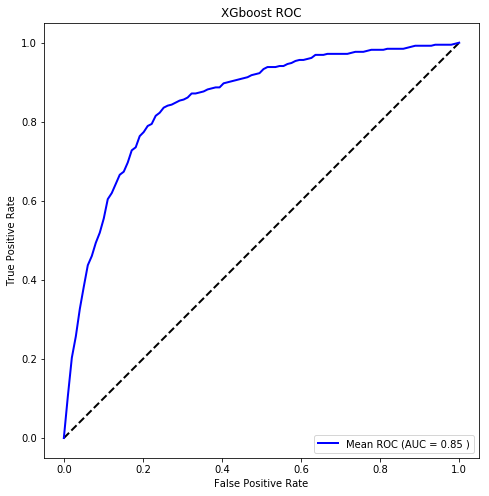

In [81]:
plot_roc(tprs_xgb,"XGboost")

#####  Optimización de parámetros

In [82]:
import scipy.stats as st

In [83]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [84]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [85]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=20, verbose= True,cv=5)

In [86]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 37.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023E820F68D0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv

In [87]:
xgb_opt=xgb.best_estimator_

In [168]:
xgb_opt

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9514174548148443,
              gamma=5.497179041337087, learning_rate=0.0799080119162706,
              max_delta_step=0, max_depth=3,
              min_child_weight=6.5697415599378814, missing=None,
              n_estimators=38, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=5.566410856550542, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9459722693660789,
              verbosity=1)

In [88]:
predp_Xt_xgbopt,predp_Xtest_xgbopt,auc_score_xgbopt,tprs_xgbopt=model_(xgb_opt)

Haciendo fold:  1
Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [89]:
auc_score_xgbopt

0.8476691859690743

El valor del AUC es: 0.8536430342979477 después de agregar el RsearchCV

El valor del AUC es:  0.8491908629405918

Graficamos la curva ROC por clase

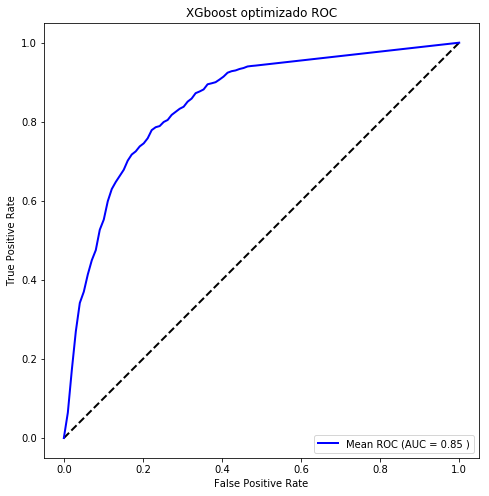

In [99]:
plot_roc(tprs_xgbopt,"XGboost optimizado")

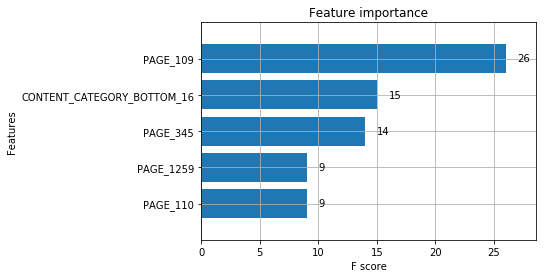

In [176]:
from xgboost import plot_importance
plot_importance(xgb_opt, height = 0.8,max_num_features=5);

In [188]:
top10_idx=predp_Xtest_xgbopt.sort_values(ascending=False).head(10).index

In [195]:
X_test.loc[top10_idx,["PAGE_109","CONTENT_CATEGORY_BOTTOM_16","PAGE_345","PAGE_1259","PAGE_110"]]

,PAGE_109,CONTENT_CATEGORY_BOTTOM_16,PAGE_345,PAGE_1259,PAGE_110
USER_ID,,,,,
437,0.011958,0.023418,0.002990,0.013951,0.026408
3175,0.018844,0.026382,0.002513,0.006281,0.027638
7150,0.022118,0.059974,0.001701,0.008082,0.028924
4010,0.031630,0.077859,0.002433,0.007299,0.048662
10714,0.029084,0.103187,0.000598,0.001195,0.038247
4098,0.040724,0.049774,0.009050,0.018100,0.076923
1550,0.031657,0.051210,0.000931,0.010242,0.042831
8934,0.015138,0.013357,0.011576,0.016028,0.036509
7623,0.003933,0.038348,0.001475,0.008850,0.012291


#### 2.5.4 LightGBM

Esta librería permite directamente interactuar con SciKitLearn

#####  Sin optimizar hiperparámetros

In [101]:
import lightgbm as lgb

In [102]:
 model_lgb = lgb.LGBMClassifier()

In [103]:
predp_Xt_lgbm,predp_Xtest_lgbm,auc_score_lgbm,tprs_lgbm=model_(model_lgb)

Haciendo fold:  1
Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [104]:
print("Valor AUC: ",auc_score_lgbm)

Valor AUC:  0.8319487932666009


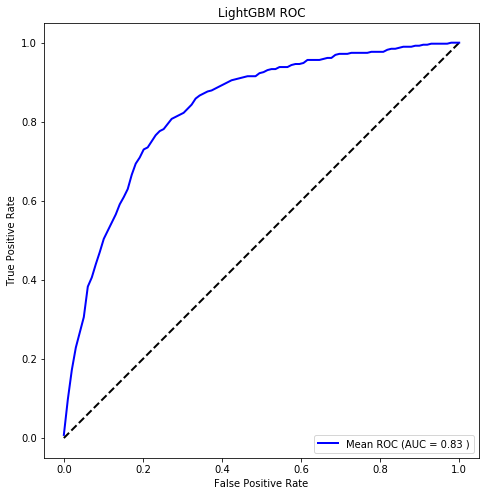

In [105]:
plot_roc(tprs_lgbm,"LightGBM")

#####  Optimización de hiperparámetros

In [106]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True,cv=5)

In [107]:
lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023E820F6

In [108]:
opt_lgbm = lgbm.best_estimator_

In [109]:
predp_Xt_lgbmopt,predp_Xtest_lgbmopt,auc_score_lgbmopt,tprs_lgbmopt=model_(opt_lgbm)

Haciendo fold:  1
Fit terminado fold:  1
Haciendo fold:  2
Fit terminado fold:  2
Haciendo fold:  3
Fit terminado fold:  3
Haciendo fold:  4
Fit terminado fold:  4
Haciendo fold:  5
Fit terminado fold:  5


In [110]:
print("Valor AUC: ",auc_score_lgbmopt)

Valor AUC:  0.8530744696464556


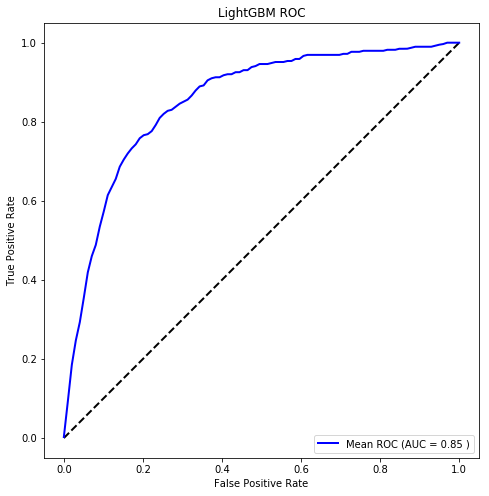

In [111]:
plot_roc(tprs_lgbmopt,"LightGBM")

#### 2.5.5 CatBoost

#####  Sin optimizar hiperparámetros

In [112]:
from catboost import CatBoostClassifier

In [113]:
model_cat = CatBoostClassifier()

In [114]:
predp_Xt_cat,predp_Xtest_cat,auc_score_cat,tprs_cat=model_(model_cat)

Haciendo fold:  1
Learning rate set to 0.031417
0:	learn: 0.6450375	total: 2.28s	remaining: 37m 55s
1:	learn: 0.6011541	total: 3.57s	remaining: 29m 39s
2:	learn: 0.5614892	total: 4.77s	remaining: 26m 24s
3:	learn: 0.5228171	total: 6.04s	remaining: 25m 4s
4:	learn: 0.4896732	total: 7.43s	remaining: 24m 39s
5:	learn: 0.4569524	total: 8.7s	remaining: 24m 1s
6:	learn: 0.4284783	total: 10.1s	remaining: 23m 47s
7:	learn: 0.4039916	total: 11.4s	remaining: 23m 28s
8:	learn: 0.3818105	total: 12.6s	remaining: 23m 5s
9:	learn: 0.3609400	total: 13.8s	remaining: 22m 51s
10:	learn: 0.3378936	total: 15.1s	remaining: 22m 38s
11:	learn: 0.3215334	total: 16.3s	remaining: 22m 24s
12:	learn: 0.3040448	total: 17.6s	remaining: 22m 17s
13:	learn: 0.2892173	total: 18.9s	remaining: 22m 11s
14:	learn: 0.2764647	total: 20.2s	remaining: 22m 3s
15:	learn: 0.2637167	total: 21.5s	remaining: 22m
16:	learn: 0.2529997	total: 22.8s	remaining: 21m 56s
17:	learn: 0.2435506	total: 24.1s	remaining: 21m 53s
18:	learn: 0.2320

152:	learn: 0.1057416	total: 3m 29s	remaining: 19m 17s
153:	learn: 0.1056905	total: 3m 30s	remaining: 19m 15s
154:	learn: 0.1055020	total: 3m 31s	remaining: 19m 14s
155:	learn: 0.1054018	total: 3m 32s	remaining: 19m 12s
156:	learn: 0.1053400	total: 3m 34s	remaining: 19m 10s
157:	learn: 0.1052875	total: 3m 35s	remaining: 19m 9s
158:	learn: 0.1052455	total: 3m 37s	remaining: 19m 8s
159:	learn: 0.1050972	total: 3m 38s	remaining: 19m 7s
160:	learn: 0.1050864	total: 3m 39s	remaining: 19m 5s
161:	learn: 0.1050244	total: 3m 41s	remaining: 19m 3s
162:	learn: 0.1049421	total: 3m 42s	remaining: 19m 1s
163:	learn: 0.1049043	total: 3m 43s	remaining: 19m
164:	learn: 0.1048507	total: 3m 45s	remaining: 18m 59s
165:	learn: 0.1048204	total: 3m 46s	remaining: 18m 57s
166:	learn: 0.1047330	total: 3m 47s	remaining: 18m 55s
167:	learn: 0.1047107	total: 3m 48s	remaining: 18m 53s
168:	learn: 0.1046279	total: 3m 50s	remaining: 18m 52s
169:	learn: 0.1045752	total: 3m 51s	remaining: 18m 50s
170:	learn: 0.104486

303:	learn: 0.0928175	total: 6m 51s	remaining: 15m 41s
304:	learn: 0.0927279	total: 6m 52s	remaining: 15m 40s
305:	learn: 0.0926399	total: 6m 53s	remaining: 15m 38s
306:	learn: 0.0926093	total: 6m 55s	remaining: 15m 37s
307:	learn: 0.0925211	total: 6m 56s	remaining: 15m 35s
308:	learn: 0.0924167	total: 6m 57s	remaining: 15m 33s
309:	learn: 0.0923214	total: 6m 58s	remaining: 15m 32s
310:	learn: 0.0922269	total: 7m	remaining: 15m 31s
311:	learn: 0.0921420	total: 7m 1s	remaining: 15m 29s
312:	learn: 0.0920566	total: 7m 2s	remaining: 15m 28s
313:	learn: 0.0919564	total: 7m 4s	remaining: 15m 26s
314:	learn: 0.0919024	total: 7m 5s	remaining: 15m 25s
315:	learn: 0.0918334	total: 7m 6s	remaining: 15m 23s
316:	learn: 0.0917532	total: 7m 7s	remaining: 15m 22s
317:	learn: 0.0916525	total: 7m 9s	remaining: 15m 20s
318:	learn: 0.0915561	total: 7m 10s	remaining: 15m 19s
319:	learn: 0.0914576	total: 7m 11s	remaining: 15m 17s
320:	learn: 0.0914195	total: 7m 13s	remaining: 15m 15s
321:	learn: 0.0913434

454:	learn: 0.0811302	total: 10m 2s	remaining: 12m 1s
455:	learn: 0.0810930	total: 10m 3s	remaining: 11m 59s
456:	learn: 0.0810572	total: 10m 4s	remaining: 11m 58s
457:	learn: 0.0810034	total: 10m 5s	remaining: 11m 56s
458:	learn: 0.0808852	total: 10m 7s	remaining: 11m 55s
459:	learn: 0.0807980	total: 10m 8s	remaining: 11m 54s
460:	learn: 0.0807553	total: 10m 9s	remaining: 11m 52s
461:	learn: 0.0806908	total: 10m 11s	remaining: 11m 51s
462:	learn: 0.0806398	total: 10m 12s	remaining: 11m 50s
463:	learn: 0.0805804	total: 10m 13s	remaining: 11m 48s
464:	learn: 0.0805089	total: 10m 14s	remaining: 11m 47s
465:	learn: 0.0804574	total: 10m 16s	remaining: 11m 45s
466:	learn: 0.0803802	total: 10m 17s	remaining: 11m 44s
467:	learn: 0.0803267	total: 10m 18s	remaining: 11m 43s
468:	learn: 0.0803061	total: 10m 19s	remaining: 11m 41s
469:	learn: 0.0802242	total: 10m 21s	remaining: 11m 40s
470:	learn: 0.0801475	total: 10m 22s	remaining: 11m 38s
471:	learn: 0.0800715	total: 10m 23s	remaining: 11m 37s


603:	learn: 0.0727510	total: 12m 55s	remaining: 8m 28s
604:	learn: 0.0726532	total: 12m 56s	remaining: 8m 26s
605:	learn: 0.0725922	total: 12m 56s	remaining: 8m 25s
606:	learn: 0.0724709	total: 12m 57s	remaining: 8m 23s
607:	learn: 0.0724367	total: 12m 58s	remaining: 8m 21s
608:	learn: 0.0724163	total: 12m 59s	remaining: 8m 20s
609:	learn: 0.0723790	total: 12m 59s	remaining: 8m 18s
610:	learn: 0.0723418	total: 13m	remaining: 8m 17s
611:	learn: 0.0723174	total: 13m 1s	remaining: 8m 15s
612:	learn: 0.0722605	total: 13m 2s	remaining: 8m 13s
613:	learn: 0.0722140	total: 13m 3s	remaining: 8m 12s
614:	learn: 0.0721593	total: 13m 3s	remaining: 8m 10s
615:	learn: 0.0720403	total: 13m 4s	remaining: 8m 9s
616:	learn: 0.0720042	total: 13m 5s	remaining: 8m 7s
617:	learn: 0.0719577	total: 13m 6s	remaining: 8m 5s
618:	learn: 0.0719005	total: 13m 7s	remaining: 8m 4s
619:	learn: 0.0718492	total: 13m 7s	remaining: 8m 2s
620:	learn: 0.0717521	total: 13m 8s	remaining: 8m 1s
621:	learn: 0.0717435	total: 1

754:	learn: 0.0656078	total: 15m 32s	remaining: 5m 2s
755:	learn: 0.0655595	total: 15m 34s	remaining: 5m 1s
756:	learn: 0.0655516	total: 15m 35s	remaining: 5m
757:	learn: 0.0655237	total: 15m 36s	remaining: 4m 59s
758:	learn: 0.0655076	total: 15m 37s	remaining: 4m 57s
759:	learn: 0.0654720	total: 15m 39s	remaining: 4m 56s
760:	learn: 0.0654010	total: 15m 40s	remaining: 4m 55s
761:	learn: 0.0653374	total: 15m 41s	remaining: 4m 54s
762:	learn: 0.0652675	total: 15m 42s	remaining: 4m 52s
763:	learn: 0.0652146	total: 15m 44s	remaining: 4m 51s
764:	learn: 0.0651874	total: 15m 45s	remaining: 4m 50s
765:	learn: 0.0651482	total: 15m 46s	remaining: 4m 49s
766:	learn: 0.0650998	total: 15m 47s	remaining: 4m 47s
767:	learn: 0.0650765	total: 15m 49s	remaining: 4m 46s
768:	learn: 0.0650333	total: 15m 50s	remaining: 4m 45s
769:	learn: 0.0649420	total: 15m 51s	remaining: 4m 44s
770:	learn: 0.0648855	total: 15m 53s	remaining: 4m 43s
771:	learn: 0.0648618	total: 15m 54s	remaining: 4m 41s
772:	learn: 0.06

905:	learn: 0.0595434	total: 18m 48s	remaining: 1m 57s
906:	learn: 0.0595278	total: 18m 49s	remaining: 1m 55s
907:	learn: 0.0595090	total: 18m 50s	remaining: 1m 54s
908:	learn: 0.0594867	total: 18m 52s	remaining: 1m 53s
909:	learn: 0.0594464	total: 18m 53s	remaining: 1m 52s
910:	learn: 0.0594219	total: 18m 54s	remaining: 1m 50s
911:	learn: 0.0594079	total: 18m 56s	remaining: 1m 49s
912:	learn: 0.0593317	total: 18m 57s	remaining: 1m 48s
913:	learn: 0.0593031	total: 18m 58s	remaining: 1m 47s
914:	learn: 0.0592634	total: 19m	remaining: 1m 45s
915:	learn: 0.0591931	total: 19m 1s	remaining: 1m 44s
916:	learn: 0.0591829	total: 19m 2s	remaining: 1m 43s
917:	learn: 0.0591645	total: 19m 3s	remaining: 1m 42s
918:	learn: 0.0591226	total: 19m 5s	remaining: 1m 40s
919:	learn: 0.0590758	total: 19m 6s	remaining: 1m 39s
920:	learn: 0.0590507	total: 19m 7s	remaining: 1m 38s
921:	learn: 0.0589863	total: 19m 8s	remaining: 1m 37s
922:	learn: 0.0589608	total: 19m 10s	remaining: 1m 35s
923:	learn: 0.0589229

57:	learn: 0.1205933	total: 1m 16s	remaining: 20m 46s
58:	learn: 0.1201040	total: 1m 18s	remaining: 20m 44s
59:	learn: 0.1197308	total: 1m 19s	remaining: 20m 41s
60:	learn: 0.1192540	total: 1m 20s	remaining: 20m 40s
61:	learn: 0.1184432	total: 1m 21s	remaining: 20m 38s
62:	learn: 0.1180544	total: 1m 23s	remaining: 20m 35s
63:	learn: 0.1176201	total: 1m 24s	remaining: 20m 33s
64:	learn: 0.1173887	total: 1m 25s	remaining: 20m 30s
65:	learn: 0.1169973	total: 1m 26s	remaining: 20m 27s
66:	learn: 0.1167575	total: 1m 27s	remaining: 20m 24s
67:	learn: 0.1165572	total: 1m 29s	remaining: 20m 21s
68:	learn: 0.1163954	total: 1m 30s	remaining: 20m 18s
69:	learn: 0.1159139	total: 1m 31s	remaining: 20m 14s
70:	learn: 0.1155988	total: 1m 32s	remaining: 20m 12s
71:	learn: 0.1151990	total: 1m 33s	remaining: 20m 10s
72:	learn: 0.1149091	total: 1m 35s	remaining: 20m 9s
73:	learn: 0.1145388	total: 1m 36s	remaining: 20m 7s
74:	learn: 0.1142346	total: 1m 37s	remaining: 20m 5s
75:	learn: 0.1136431	total: 1m 

208:	learn: 0.0977988	total: 4m 29s	remaining: 17m
209:	learn: 0.0977260	total: 4m 30s	remaining: 16m 58s
210:	learn: 0.0976863	total: 4m 32s	remaining: 16m 57s
211:	learn: 0.0975460	total: 4m 33s	remaining: 16m 56s
212:	learn: 0.0974715	total: 4m 34s	remaining: 16m 54s
213:	learn: 0.0973928	total: 4m 35s	remaining: 16m 53s
214:	learn: 0.0973252	total: 4m 37s	remaining: 16m 51s
215:	learn: 0.0972433	total: 4m 38s	remaining: 16m 50s
216:	learn: 0.0971575	total: 4m 39s	remaining: 16m 48s
217:	learn: 0.0970368	total: 4m 40s	remaining: 16m 47s
218:	learn: 0.0969958	total: 4m 42s	remaining: 16m 46s
219:	learn: 0.0969393	total: 4m 43s	remaining: 16m 45s
220:	learn: 0.0968086	total: 4m 44s	remaining: 16m 43s
221:	learn: 0.0967435	total: 4m 46s	remaining: 16m 42s
222:	learn: 0.0965976	total: 4m 47s	remaining: 16m 41s
223:	learn: 0.0964277	total: 4m 48s	remaining: 16m 39s
224:	learn: 0.0963706	total: 4m 49s	remaining: 16m 38s
225:	learn: 0.0962233	total: 4m 51s	remaining: 16m 37s
226:	learn: 0.

359:	learn: 0.0860101	total: 7m 48s	remaining: 13m 52s
360:	learn: 0.0859378	total: 7m 49s	remaining: 13m 51s
361:	learn: 0.0858696	total: 7m 50s	remaining: 13m 49s
362:	learn: 0.0857585	total: 7m 52s	remaining: 13m 48s
363:	learn: 0.0856492	total: 7m 53s	remaining: 13m 47s
364:	learn: 0.0855839	total: 7m 54s	remaining: 13m 45s
365:	learn: 0.0855381	total: 7m 55s	remaining: 13m 44s
366:	learn: 0.0854892	total: 7m 57s	remaining: 13m 43s
367:	learn: 0.0854032	total: 7m 58s	remaining: 13m 41s
368:	learn: 0.0853504	total: 7m 59s	remaining: 13m 40s
369:	learn: 0.0853063	total: 8m	remaining: 13m 38s
370:	learn: 0.0852049	total: 8m 2s	remaining: 13m 37s
371:	learn: 0.0851536	total: 8m 3s	remaining: 13m 36s
372:	learn: 0.0849963	total: 8m 4s	remaining: 13m 34s
373:	learn: 0.0849360	total: 8m 6s	remaining: 13m 33s
374:	learn: 0.0849045	total: 8m 7s	remaining: 13m 32s
375:	learn: 0.0848402	total: 8m 8s	remaining: 13m 30s
376:	learn: 0.0847613	total: 8m 9s	remaining: 13m 29s
377:	learn: 0.0846788

509:	learn: 0.0757643	total: 11m 3s	remaining: 10m 37s
510:	learn: 0.0757206	total: 11m 5s	remaining: 10m 36s
511:	learn: 0.0756916	total: 11m 6s	remaining: 10m 35s
512:	learn: 0.0756648	total: 11m 7s	remaining: 10m 33s
513:	learn: 0.0756384	total: 11m 8s	remaining: 10m 32s
514:	learn: 0.0756019	total: 11m 10s	remaining: 10m 31s
515:	learn: 0.0755863	total: 11m 11s	remaining: 10m 29s
516:	learn: 0.0755583	total: 11m 12s	remaining: 10m 28s
517:	learn: 0.0755212	total: 11m 13s	remaining: 10m 27s
518:	learn: 0.0754827	total: 11m 15s	remaining: 10m 25s
519:	learn: 0.0754007	total: 11m 16s	remaining: 10m 24s
520:	learn: 0.0753792	total: 11m 17s	remaining: 10m 23s
521:	learn: 0.0753433	total: 11m 19s	remaining: 10m 21s
522:	learn: 0.0752685	total: 11m 20s	remaining: 10m 20s
523:	learn: 0.0752130	total: 11m 21s	remaining: 10m 19s
524:	learn: 0.0751186	total: 11m 22s	remaining: 10m 17s
525:	learn: 0.0750252	total: 11m 24s	remaining: 10m 16s
526:	learn: 0.0749900	total: 11m 25s	remaining: 10m 1

659:	learn: 0.0682388	total: 14m 22s	remaining: 7m 24s
660:	learn: 0.0682008	total: 14m 23s	remaining: 7m 22s
661:	learn: 0.0681531	total: 14m 24s	remaining: 7m 21s
662:	learn: 0.0681369	total: 14m 25s	remaining: 7m 20s
663:	learn: 0.0680980	total: 14m 27s	remaining: 7m 18s
664:	learn: 0.0680435	total: 14m 28s	remaining: 7m 17s
665:	learn: 0.0679803	total: 14m 29s	remaining: 7m 16s
666:	learn: 0.0679512	total: 14m 31s	remaining: 7m 14s
667:	learn: 0.0679311	total: 14m 32s	remaining: 7m 13s
668:	learn: 0.0679099	total: 14m 33s	remaining: 7m 12s
669:	learn: 0.0678802	total: 14m 34s	remaining: 7m 10s
670:	learn: 0.0678588	total: 14m 36s	remaining: 7m 9s
671:	learn: 0.0678304	total: 14m 37s	remaining: 7m 8s
672:	learn: 0.0678114	total: 14m 38s	remaining: 7m 7s
673:	learn: 0.0677702	total: 14m 40s	remaining: 7m 5s
674:	learn: 0.0677611	total: 14m 41s	remaining: 7m 4s
675:	learn: 0.0677454	total: 14m 43s	remaining: 7m 3s
676:	learn: 0.0677132	total: 14m 44s	remaining: 7m 2s
677:	learn: 0.067

810:	learn: 0.0626634	total: 17m 34s	remaining: 4m 5s
811:	learn: 0.0626042	total: 17m 35s	remaining: 4m 4s
812:	learn: 0.0625689	total: 17m 36s	remaining: 4m 3s
813:	learn: 0.0625373	total: 17m 38s	remaining: 4m 1s
814:	learn: 0.0625263	total: 17m 39s	remaining: 4m
815:	learn: 0.0625171	total: 17m 40s	remaining: 3m 59s
816:	learn: 0.0624912	total: 17m 41s	remaining: 3m 57s
817:	learn: 0.0624652	total: 17m 43s	remaining: 3m 56s
818:	learn: 0.0623533	total: 17m 44s	remaining: 3m 55s
819:	learn: 0.0623260	total: 17m 45s	remaining: 3m 53s
820:	learn: 0.0623055	total: 17m 47s	remaining: 3m 52s
821:	learn: 0.0622943	total: 17m 48s	remaining: 3m 51s
822:	learn: 0.0622811	total: 17m 49s	remaining: 3m 50s
823:	learn: 0.0622479	total: 17m 51s	remaining: 3m 48s
824:	learn: 0.0622307	total: 17m 52s	remaining: 3m 47s
825:	learn: 0.0621530	total: 17m 54s	remaining: 3m 46s
826:	learn: 0.0621368	total: 17m 55s	remaining: 3m 45s
827:	learn: 0.0620907	total: 17m 57s	remaining: 3m 43s
828:	learn: 0.0620

961:	learn: 0.0579386	total: 20m 54s	remaining: 49.5s
962:	learn: 0.0579185	total: 20m 54s	remaining: 48.2s
963:	learn: 0.0578420	total: 20m 55s	remaining: 46.9s
964:	learn: 0.0578196	total: 20m 56s	remaining: 45.6s
965:	learn: 0.0577946	total: 20m 57s	remaining: 44.3s
966:	learn: 0.0577666	total: 20m 58s	remaining: 42.9s
967:	learn: 0.0577500	total: 20m 58s	remaining: 41.6s
968:	learn: 0.0577399	total: 20m 59s	remaining: 40.3s
969:	learn: 0.0577233	total: 21m	remaining: 39s
970:	learn: 0.0576819	total: 21m 1s	remaining: 37.7s
971:	learn: 0.0576636	total: 21m 1s	remaining: 36.4s
972:	learn: 0.0576538	total: 21m 2s	remaining: 35s
973:	learn: 0.0576308	total: 21m 3s	remaining: 33.7s
974:	learn: 0.0575859	total: 21m 4s	remaining: 32.4s
975:	learn: 0.0575640	total: 21m 5s	remaining: 31.1s
976:	learn: 0.0575481	total: 21m 5s	remaining: 29.8s
977:	learn: 0.0575114	total: 21m 6s	remaining: 28.5s
978:	learn: 0.0574993	total: 21m 7s	remaining: 27.2s
979:	learn: 0.0574219	total: 21m 8s	remaining

115:	learn: 0.1092477	total: 1m 33s	remaining: 11m 51s
116:	learn: 0.1091504	total: 1m 34s	remaining: 11m 50s
117:	learn: 0.1088845	total: 1m 34s	remaining: 11m 50s
118:	learn: 0.1087656	total: 1m 35s	remaining: 11m 49s
119:	learn: 0.1086244	total: 1m 36s	remaining: 11m 48s
120:	learn: 0.1085883	total: 1m 37s	remaining: 11m 47s
121:	learn: 0.1085443	total: 1m 38s	remaining: 11m 46s
122:	learn: 0.1084312	total: 1m 38s	remaining: 11m 45s
123:	learn: 0.1081923	total: 1m 39s	remaining: 11m 44s
124:	learn: 0.1080884	total: 1m 40s	remaining: 11m 43s
125:	learn: 0.1078540	total: 1m 41s	remaining: 11m 42s
126:	learn: 0.1078332	total: 1m 42s	remaining: 11m 41s
127:	learn: 0.1077309	total: 1m 42s	remaining: 11m 40s
128:	learn: 0.1075631	total: 1m 43s	remaining: 11m 40s
129:	learn: 0.1074412	total: 1m 44s	remaining: 11m 39s
130:	learn: 0.1073853	total: 1m 45s	remaining: 11m 38s
131:	learn: 0.1073030	total: 1m 46s	remaining: 11m 37s
132:	learn: 0.1072250	total: 1m 46s	remaining: 11m 36s
133:	learn

266:	learn: 0.0947718	total: 3m 33s	remaining: 9m 46s
267:	learn: 0.0947245	total: 3m 34s	remaining: 9m 45s
268:	learn: 0.0946379	total: 3m 35s	remaining: 9m 45s
269:	learn: 0.0945829	total: 3m 36s	remaining: 9m 44s
270:	learn: 0.0945461	total: 3m 36s	remaining: 9m 43s
271:	learn: 0.0944508	total: 3m 37s	remaining: 9m 42s
272:	learn: 0.0944145	total: 3m 38s	remaining: 9m 41s
273:	learn: 0.0943490	total: 3m 39s	remaining: 9m 40s
274:	learn: 0.0943267	total: 3m 39s	remaining: 9m 39s
275:	learn: 0.0941498	total: 3m 40s	remaining: 9m 39s
276:	learn: 0.0940888	total: 3m 41s	remaining: 9m 38s
277:	learn: 0.0939633	total: 3m 42s	remaining: 9m 37s
278:	learn: 0.0939315	total: 3m 43s	remaining: 9m 36s
279:	learn: 0.0938719	total: 3m 43s	remaining: 9m 35s
280:	learn: 0.0938326	total: 3m 44s	remaining: 9m 34s
281:	learn: 0.0937278	total: 3m 45s	remaining: 9m 34s
282:	learn: 0.0936599	total: 3m 46s	remaining: 9m 33s
283:	learn: 0.0935840	total: 3m 47s	remaining: 9m 32s
284:	learn: 0.0934901	total:

419:	learn: 0.0820419	total: 5m 35s	remaining: 7m 43s
420:	learn: 0.0819473	total: 5m 36s	remaining: 7m 42s
421:	learn: 0.0818969	total: 5m 36s	remaining: 7m 41s
422:	learn: 0.0818406	total: 5m 37s	remaining: 7m 40s
423:	learn: 0.0817918	total: 5m 38s	remaining: 7m 39s
424:	learn: 0.0816820	total: 5m 39s	remaining: 7m 38s
425:	learn: 0.0816310	total: 5m 40s	remaining: 7m 38s
426:	learn: 0.0815762	total: 5m 40s	remaining: 7m 37s
427:	learn: 0.0814993	total: 5m 41s	remaining: 7m 36s
428:	learn: 0.0814389	total: 5m 42s	remaining: 7m 35s
429:	learn: 0.0813689	total: 5m 43s	remaining: 7m 34s
430:	learn: 0.0813035	total: 5m 44s	remaining: 7m 34s
431:	learn: 0.0812192	total: 5m 44s	remaining: 7m 33s
432:	learn: 0.0811263	total: 5m 45s	remaining: 7m 32s
433:	learn: 0.0809604	total: 5m 46s	remaining: 7m 31s
434:	learn: 0.0809142	total: 5m 47s	remaining: 7m 31s
435:	learn: 0.0808420	total: 5m 48s	remaining: 7m 30s
436:	learn: 0.0807556	total: 5m 48s	remaining: 7m 29s
437:	learn: 0.0806696	total:

572:	learn: 0.0719266	total: 7m 36s	remaining: 5m 39s
573:	learn: 0.0719065	total: 7m 36s	remaining: 5m 39s
574:	learn: 0.0718514	total: 7m 37s	remaining: 5m 38s
575:	learn: 0.0717507	total: 7m 38s	remaining: 5m 37s
576:	learn: 0.0717256	total: 7m 39s	remaining: 5m 36s
577:	learn: 0.0716518	total: 7m 40s	remaining: 5m 35s
578:	learn: 0.0716135	total: 7m 40s	remaining: 5m 35s
579:	learn: 0.0715767	total: 7m 41s	remaining: 5m 34s
580:	learn: 0.0715098	total: 7m 42s	remaining: 5m 33s
581:	learn: 0.0714177	total: 7m 43s	remaining: 5m 32s
582:	learn: 0.0713836	total: 7m 44s	remaining: 5m 31s
583:	learn: 0.0713453	total: 7m 44s	remaining: 5m 31s
584:	learn: 0.0713144	total: 7m 45s	remaining: 5m 30s
585:	learn: 0.0712769	total: 7m 46s	remaining: 5m 29s
586:	learn: 0.0712348	total: 7m 47s	remaining: 5m 28s
587:	learn: 0.0711949	total: 7m 48s	remaining: 5m 27s
588:	learn: 0.0711021	total: 7m 48s	remaining: 5m 27s
589:	learn: 0.0710701	total: 7m 49s	remaining: 5m 26s
590:	learn: 0.0710376	total:

725:	learn: 0.0641154	total: 9m 34s	remaining: 3m 36s
726:	learn: 0.0640731	total: 9m 35s	remaining: 3m 35s
727:	learn: 0.0640291	total: 9m 35s	remaining: 3m 35s
728:	learn: 0.0639808	total: 9m 36s	remaining: 3m 34s
729:	learn: 0.0639602	total: 9m 37s	remaining: 3m 33s
730:	learn: 0.0639248	total: 9m 38s	remaining: 3m 32s
731:	learn: 0.0638878	total: 9m 38s	remaining: 3m 31s
732:	learn: 0.0638569	total: 9m 39s	remaining: 3m 31s
733:	learn: 0.0638281	total: 9m 40s	remaining: 3m 30s
734:	learn: 0.0638006	total: 9m 41s	remaining: 3m 29s
735:	learn: 0.0637412	total: 9m 42s	remaining: 3m 28s
736:	learn: 0.0636944	total: 9m 42s	remaining: 3m 27s
737:	learn: 0.0636482	total: 9m 43s	remaining: 3m 27s
738:	learn: 0.0635688	total: 9m 44s	remaining: 3m 26s
739:	learn: 0.0635155	total: 9m 45s	remaining: 3m 25s
740:	learn: 0.0634523	total: 9m 45s	remaining: 3m 24s
741:	learn: 0.0634423	total: 9m 46s	remaining: 3m 23s
742:	learn: 0.0633733	total: 9m 47s	remaining: 3m 23s
743:	learn: 0.0633314	total:

876:	learn: 0.0574891	total: 11m 34s	remaining: 1m 37s
877:	learn: 0.0574743	total: 11m 35s	remaining: 1m 36s
878:	learn: 0.0574612	total: 11m 35s	remaining: 1m 35s
879:	learn: 0.0574358	total: 11m 36s	remaining: 1m 35s
880:	learn: 0.0574023	total: 11m 37s	remaining: 1m 34s
881:	learn: 0.0573498	total: 11m 38s	remaining: 1m 33s
882:	learn: 0.0572795	total: 11m 39s	remaining: 1m 32s
883:	learn: 0.0572467	total: 11m 40s	remaining: 1m 31s
884:	learn: 0.0572360	total: 11m 41s	remaining: 1m 31s
885:	learn: 0.0572268	total: 11m 41s	remaining: 1m 30s
886:	learn: 0.0571642	total: 11m 42s	remaining: 1m 29s
887:	learn: 0.0571496	total: 11m 43s	remaining: 1m 28s
888:	learn: 0.0571445	total: 11m 44s	remaining: 1m 27s
889:	learn: 0.0571372	total: 11m 45s	remaining: 1m 27s
890:	learn: 0.0570898	total: 11m 45s	remaining: 1m 26s
891:	learn: 0.0570489	total: 11m 46s	remaining: 1m 25s
892:	learn: 0.0569851	total: 11m 47s	remaining: 1m 24s
893:	learn: 0.0569281	total: 11m 48s	remaining: 1m 23s
894:	learn

28:	learn: 0.1673861	total: 26.7s	remaining: 14m 54s
29:	learn: 0.1647894	total: 27.6s	remaining: 14m 51s
30:	learn: 0.1616758	total: 28.4s	remaining: 14m 47s
31:	learn: 0.1590538	total: 29.3s	remaining: 14m 46s
32:	learn: 0.1570876	total: 30.1s	remaining: 14m 43s
33:	learn: 0.1543644	total: 31s	remaining: 14m 39s
34:	learn: 0.1519116	total: 31.8s	remaining: 14m 37s
35:	learn: 0.1493634	total: 32.7s	remaining: 14m 35s
36:	learn: 0.1479701	total: 33.6s	remaining: 14m 34s
37:	learn: 0.1461131	total: 34.5s	remaining: 14m 32s
38:	learn: 0.1444049	total: 35.3s	remaining: 14m 29s
39:	learn: 0.1417287	total: 36.1s	remaining: 14m 26s
40:	learn: 0.1402933	total: 36.9s	remaining: 14m 23s
41:	learn: 0.1385449	total: 37.7s	remaining: 14m 20s
42:	learn: 0.1372173	total: 38.5s	remaining: 14m 17s
43:	learn: 0.1361983	total: 39.3s	remaining: 14m 14s
44:	learn: 0.1351122	total: 40.1s	remaining: 14m 11s
45:	learn: 0.1336362	total: 40.9s	remaining: 14m 8s
46:	learn: 0.1323113	total: 41.8s	remaining: 14m 

181:	learn: 0.1004041	total: 2m 32s	remaining: 11m 24s
182:	learn: 0.1003270	total: 2m 33s	remaining: 11m 23s
183:	learn: 0.1001795	total: 2m 33s	remaining: 11m 22s
184:	learn: 0.1000933	total: 2m 34s	remaining: 11m 21s
185:	learn: 0.1000275	total: 2m 35s	remaining: 11m 20s
186:	learn: 0.0999190	total: 2m 36s	remaining: 11m 19s
187:	learn: 0.0998093	total: 2m 37s	remaining: 11m 19s
188:	learn: 0.0997292	total: 2m 37s	remaining: 11m 17s
189:	learn: 0.0995779	total: 2m 38s	remaining: 11m 17s
190:	learn: 0.0994743	total: 2m 39s	remaining: 11m 16s
191:	learn: 0.0993799	total: 2m 40s	remaining: 11m 15s
192:	learn: 0.0993150	total: 2m 41s	remaining: 11m 14s
193:	learn: 0.0992820	total: 2m 42s	remaining: 11m 13s
194:	learn: 0.0992084	total: 2m 42s	remaining: 11m 12s
195:	learn: 0.0991299	total: 2m 43s	remaining: 11m 11s
196:	learn: 0.0990319	total: 2m 44s	remaining: 11m 10s
197:	learn: 0.0989599	total: 2m 45s	remaining: 11m 9s
198:	learn: 0.0988756	total: 2m 46s	remaining: 11m 8s
199:	learn: 

333:	learn: 0.0889015	total: 4m 40s	remaining: 9m 18s
334:	learn: 0.0888486	total: 4m 40s	remaining: 9m 17s
335:	learn: 0.0887813	total: 4m 41s	remaining: 9m 16s
336:	learn: 0.0886847	total: 4m 42s	remaining: 9m 15s
337:	learn: 0.0886506	total: 4m 43s	remaining: 9m 14s
338:	learn: 0.0885778	total: 4m 43s	remaining: 9m 13s
339:	learn: 0.0884804	total: 4m 44s	remaining: 9m 12s
340:	learn: 0.0883741	total: 4m 45s	remaining: 9m 11s
341:	learn: 0.0883110	total: 4m 46s	remaining: 9m 10s
342:	learn: 0.0882402	total: 4m 47s	remaining: 9m 10s
343:	learn: 0.0882092	total: 4m 47s	remaining: 9m 9s
344:	learn: 0.0880929	total: 4m 48s	remaining: 9m 8s
345:	learn: 0.0880222	total: 4m 49s	remaining: 9m 7s
346:	learn: 0.0879351	total: 4m 50s	remaining: 9m 6s
347:	learn: 0.0878456	total: 4m 51s	remaining: 9m 5s
348:	learn: 0.0877227	total: 4m 51s	remaining: 9m 4s
349:	learn: 0.0875775	total: 4m 52s	remaining: 9m 3s
350:	learn: 0.0875225	total: 4m 53s	remaining: 9m 2s
351:	learn: 0.0874539	total: 4m 54s	

486:	learn: 0.0777391	total: 6m 48s	remaining: 7m 10s
487:	learn: 0.0776719	total: 6m 49s	remaining: 7m 9s
488:	learn: 0.0776340	total: 6m 50s	remaining: 7m 9s
489:	learn: 0.0775709	total: 6m 51s	remaining: 7m 8s
490:	learn: 0.0775230	total: 6m 52s	remaining: 7m 7s
491:	learn: 0.0774853	total: 6m 53s	remaining: 7m 6s
492:	learn: 0.0774339	total: 6m 54s	remaining: 7m 5s
493:	learn: 0.0774105	total: 6m 54s	remaining: 7m 4s
494:	learn: 0.0772760	total: 6m 55s	remaining: 7m 4s
495:	learn: 0.0772169	total: 6m 56s	remaining: 7m 3s
496:	learn: 0.0771711	total: 6m 57s	remaining: 7m 2s
497:	learn: 0.0771270	total: 6m 58s	remaining: 7m 1s
498:	learn: 0.0770869	total: 6m 58s	remaining: 7m
499:	learn: 0.0770429	total: 6m 59s	remaining: 6m 59s
500:	learn: 0.0769955	total: 7m	remaining: 6m 59s
501:	learn: 0.0769715	total: 7m 1s	remaining: 6m 58s
502:	learn: 0.0769307	total: 7m 2s	remaining: 6m 57s
503:	learn: 0.0768816	total: 7m 3s	remaining: 6m 56s
504:	learn: 0.0768478	total: 7m 4s	remaining: 6m 5

639:	learn: 0.0688953	total: 8m 56s	remaining: 5m 2s
640:	learn: 0.0688494	total: 8m 57s	remaining: 5m 1s
641:	learn: 0.0687391	total: 8m 58s	remaining: 5m
642:	learn: 0.0686797	total: 8m 59s	remaining: 4m 59s
643:	learn: 0.0686635	total: 9m	remaining: 4m 58s
644:	learn: 0.0686066	total: 9m	remaining: 4m 57s
645:	learn: 0.0685247	total: 9m 1s	remaining: 4m 56s
646:	learn: 0.0684564	total: 9m 2s	remaining: 4m 55s
647:	learn: 0.0684394	total: 9m 3s	remaining: 4m 55s
648:	learn: 0.0683798	total: 9m 4s	remaining: 4m 54s
649:	learn: 0.0683141	total: 9m 4s	remaining: 4m 53s
650:	learn: 0.0682931	total: 9m 5s	remaining: 4m 52s
651:	learn: 0.0682677	total: 9m 6s	remaining: 4m 51s
652:	learn: 0.0682236	total: 9m 7s	remaining: 4m 50s
653:	learn: 0.0681499	total: 9m 8s	remaining: 4m 49s
654:	learn: 0.0681249	total: 9m 8s	remaining: 4m 49s
655:	learn: 0.0680964	total: 9m 9s	remaining: 4m 48s
656:	learn: 0.0680242	total: 9m 10s	remaining: 4m 47s
657:	learn: 0.0679997	total: 9m 11s	remaining: 4m 46s

791:	learn: 0.0618782	total: 11m 7s	remaining: 2m 55s
792:	learn: 0.0618053	total: 11m 8s	remaining: 2m 54s
793:	learn: 0.0616371	total: 11m 9s	remaining: 2m 53s
794:	learn: 0.0616241	total: 11m 9s	remaining: 2m 52s
795:	learn: 0.0616087	total: 11m 10s	remaining: 2m 51s
796:	learn: 0.0615948	total: 11m 11s	remaining: 2m 51s
797:	learn: 0.0615519	total: 11m 12s	remaining: 2m 50s
798:	learn: 0.0614814	total: 11m 13s	remaining: 2m 49s
799:	learn: 0.0614169	total: 11m 14s	remaining: 2m 48s
800:	learn: 0.0613755	total: 11m 14s	remaining: 2m 47s
801:	learn: 0.0612372	total: 11m 15s	remaining: 2m 46s
802:	learn: 0.0611841	total: 11m 16s	remaining: 2m 45s
803:	learn: 0.0611743	total: 11m 17s	remaining: 2m 45s
804:	learn: 0.0611229	total: 11m 18s	remaining: 2m 44s
805:	learn: 0.0610918	total: 11m 18s	remaining: 2m 43s
806:	learn: 0.0610631	total: 11m 19s	remaining: 2m 42s
807:	learn: 0.0610548	total: 11m 20s	remaining: 2m 41s
808:	learn: 0.0610365	total: 11m 21s	remaining: 2m 40s
809:	learn: 0.

942:	learn: 0.0562846	total: 13m 8s	remaining: 47.7s
943:	learn: 0.0562031	total: 13m 9s	remaining: 46.8s
944:	learn: 0.0561940	total: 13m 9s	remaining: 46s
945:	learn: 0.0561869	total: 13m 10s	remaining: 45.1s
946:	learn: 0.0561356	total: 13m 11s	remaining: 44.3s
947:	learn: 0.0560695	total: 13m 12s	remaining: 43.5s
948:	learn: 0.0560287	total: 13m 12s	remaining: 42.6s
949:	learn: 0.0560207	total: 13m 13s	remaining: 41.8s
950:	learn: 0.0559964	total: 13m 14s	remaining: 40.9s
951:	learn: 0.0559536	total: 13m 15s	remaining: 40.1s
952:	learn: 0.0559235	total: 13m 16s	remaining: 39.3s
953:	learn: 0.0558819	total: 13m 16s	remaining: 38.4s
954:	learn: 0.0558612	total: 13m 17s	remaining: 37.6s
955:	learn: 0.0557450	total: 13m 18s	remaining: 36.8s
956:	learn: 0.0556987	total: 13m 19s	remaining: 35.9s
957:	learn: 0.0556868	total: 13m 20s	remaining: 35.1s
958:	learn: 0.0556666	total: 13m 20s	remaining: 34.2s
959:	learn: 0.0556171	total: 13m 21s	remaining: 33.4s
960:	learn: 0.0556150	total: 13m 

96:	learn: 0.1108006	total: 1m 19s	remaining: 12m 17s
97:	learn: 0.1106557	total: 1m 20s	remaining: 12m 16s
98:	learn: 0.1104383	total: 1m 20s	remaining: 12m 15s
99:	learn: 0.1103548	total: 1m 21s	remaining: 12m 14s
100:	learn: 0.1102036	total: 1m 22s	remaining: 12m 13s
101:	learn: 0.1098777	total: 1m 23s	remaining: 12m 12s
102:	learn: 0.1097849	total: 1m 23s	remaining: 12m 10s
103:	learn: 0.1096631	total: 1m 24s	remaining: 12m 9s
104:	learn: 0.1095516	total: 1m 25s	remaining: 12m 8s
105:	learn: 0.1094106	total: 1m 26s	remaining: 12m 6s
106:	learn: 0.1092353	total: 1m 26s	remaining: 12m 5s
107:	learn: 0.1090884	total: 1m 27s	remaining: 12m 4s
108:	learn: 0.1088652	total: 1m 28s	remaining: 12m 4s
109:	learn: 0.1085902	total: 1m 29s	remaining: 12m 3s
110:	learn: 0.1084220	total: 1m 30s	remaining: 12m 2s
111:	learn: 0.1081835	total: 1m 31s	remaining: 12m 2s
112:	learn: 0.1081375	total: 1m 31s	remaining: 12m 1s
113:	learn: 0.1080535	total: 1m 32s	remaining: 12m 1s
114:	learn: 0.1079862	tot

247:	learn: 0.0959451	total: 3m 17s	remaining: 10m
248:	learn: 0.0958960	total: 3m 18s	remaining: 9m 59s
249:	learn: 0.0958044	total: 3m 19s	remaining: 9m 58s
250:	learn: 0.0957453	total: 3m 20s	remaining: 9m 57s
251:	learn: 0.0956494	total: 3m 20s	remaining: 9m 56s
252:	learn: 0.0955708	total: 3m 21s	remaining: 9m 55s
253:	learn: 0.0955472	total: 3m 22s	remaining: 9m 54s
254:	learn: 0.0954798	total: 3m 23s	remaining: 9m 53s
255:	learn: 0.0954170	total: 3m 23s	remaining: 9m 52s
256:	learn: 0.0953768	total: 3m 24s	remaining: 9m 51s
257:	learn: 0.0952788	total: 3m 25s	remaining: 9m 51s
258:	learn: 0.0951738	total: 3m 26s	remaining: 9m 50s
259:	learn: 0.0951162	total: 3m 27s	remaining: 9m 49s
260:	learn: 0.0950431	total: 3m 27s	remaining: 9m 48s
261:	learn: 0.0949756	total: 3m 28s	remaining: 9m 47s
262:	learn: 0.0949269	total: 3m 29s	remaining: 9m 46s
263:	learn: 0.0948627	total: 3m 30s	remaining: 9m 45s
264:	learn: 0.0948376	total: 3m 30s	remaining: 9m 44s
265:	learn: 0.0947040	total: 3m

400:	learn: 0.0846612	total: 5m 20s	remaining: 7m 58s
401:	learn: 0.0845767	total: 5m 20s	remaining: 7m 57s
402:	learn: 0.0845475	total: 5m 21s	remaining: 7m 56s
403:	learn: 0.0844934	total: 5m 22s	remaining: 7m 55s
404:	learn: 0.0844114	total: 5m 23s	remaining: 7m 54s
405:	learn: 0.0843871	total: 5m 23s	remaining: 7m 54s
406:	learn: 0.0843193	total: 5m 24s	remaining: 7m 53s
407:	learn: 0.0842389	total: 5m 25s	remaining: 7m 52s
408:	learn: 0.0841469	total: 5m 26s	remaining: 7m 51s
409:	learn: 0.0840905	total: 5m 27s	remaining: 7m 50s
410:	learn: 0.0840220	total: 5m 27s	remaining: 7m 49s
411:	learn: 0.0839691	total: 5m 28s	remaining: 7m 48s
412:	learn: 0.0838970	total: 5m 29s	remaining: 7m 48s
413:	learn: 0.0837946	total: 5m 30s	remaining: 7m 47s
414:	learn: 0.0837347	total: 5m 30s	remaining: 7m 46s
415:	learn: 0.0836764	total: 5m 31s	remaining: 7m 45s
416:	learn: 0.0835761	total: 5m 32s	remaining: 7m 44s
417:	learn: 0.0835046	total: 5m 33s	remaining: 7m 43s
418:	learn: 0.0834500	total:

553:	learn: 0.0762820	total: 7m 17s	remaining: 5m 52s
554:	learn: 0.0762671	total: 7m 18s	remaining: 5m 51s
555:	learn: 0.0762221	total: 7m 19s	remaining: 5m 50s
556:	learn: 0.0762111	total: 7m 19s	remaining: 5m 49s
557:	learn: 0.0761604	total: 7m 20s	remaining: 5m 49s
558:	learn: 0.0761047	total: 7m 21s	remaining: 5m 48s
559:	learn: 0.0760723	total: 7m 22s	remaining: 5m 47s
560:	learn: 0.0759904	total: 7m 23s	remaining: 5m 46s
561:	learn: 0.0759145	total: 7m 23s	remaining: 5m 45s
562:	learn: 0.0758752	total: 7m 24s	remaining: 5m 45s
563:	learn: 0.0758475	total: 7m 25s	remaining: 5m 44s
564:	learn: 0.0758211	total: 7m 26s	remaining: 5m 43s
565:	learn: 0.0757723	total: 7m 26s	remaining: 5m 42s
566:	learn: 0.0757312	total: 7m 27s	remaining: 5m 41s
567:	learn: 0.0756494	total: 7m 28s	remaining: 5m 41s
568:	learn: 0.0755235	total: 7m 29s	remaining: 5m 40s
569:	learn: 0.0753529	total: 7m 29s	remaining: 5m 39s
570:	learn: 0.0752847	total: 7m 30s	remaining: 5m 38s
571:	learn: 0.0752630	total:

706:	learn: 0.0689545	total: 9m 14s	remaining: 3m 49s
707:	learn: 0.0689397	total: 9m 15s	remaining: 3m 49s
708:	learn: 0.0688903	total: 9m 16s	remaining: 3m 48s
709:	learn: 0.0688059	total: 9m 17s	remaining: 3m 47s
710:	learn: 0.0687942	total: 9m 18s	remaining: 3m 46s
711:	learn: 0.0687531	total: 9m 18s	remaining: 3m 46s
712:	learn: 0.0687195	total: 9m 19s	remaining: 3m 45s
713:	learn: 0.0687137	total: 9m 20s	remaining: 3m 44s
714:	learn: 0.0686632	total: 9m 21s	remaining: 3m 43s
715:	learn: 0.0686201	total: 9m 21s	remaining: 3m 42s
716:	learn: 0.0686080	total: 9m 22s	remaining: 3m 42s
717:	learn: 0.0685604	total: 9m 23s	remaining: 3m 41s
718:	learn: 0.0685382	total: 9m 24s	remaining: 3m 40s
719:	learn: 0.0684942	total: 9m 25s	remaining: 3m 39s
720:	learn: 0.0684749	total: 9m 25s	remaining: 3m 39s
721:	learn: 0.0683559	total: 9m 26s	remaining: 3m 38s
722:	learn: 0.0683134	total: 9m 27s	remaining: 3m 37s
723:	learn: 0.0682940	total: 9m 28s	remaining: 3m 36s
724:	learn: 0.0682507	total:

858:	learn: 0.0637509	total: 11m 11s	remaining: 1m 50s
859:	learn: 0.0637215	total: 11m 12s	remaining: 1m 49s
860:	learn: 0.0636811	total: 11m 13s	remaining: 1m 48s
861:	learn: 0.0636785	total: 11m 13s	remaining: 1m 47s
862:	learn: 0.0636300	total: 11m 14s	remaining: 1m 47s
863:	learn: 0.0635234	total: 11m 15s	remaining: 1m 46s
864:	learn: 0.0635130	total: 11m 16s	remaining: 1m 45s
865:	learn: 0.0635122	total: 11m 17s	remaining: 1m 44s
866:	learn: 0.0634870	total: 11m 17s	remaining: 1m 43s
867:	learn: 0.0634726	total: 11m 18s	remaining: 1m 43s
868:	learn: 0.0634000	total: 11m 19s	remaining: 1m 42s
869:	learn: 0.0633861	total: 11m 20s	remaining: 1m 41s
870:	learn: 0.0633796	total: 11m 20s	remaining: 1m 40s
871:	learn: 0.0633731	total: 11m 21s	remaining: 1m 40s
872:	learn: 0.0633665	total: 11m 22s	remaining: 1m 39s
873:	learn: 0.0633552	total: 11m 23s	remaining: 1m 38s
874:	learn: 0.0633519	total: 11m 23s	remaining: 1m 37s
875:	learn: 0.0633168	total: 11m 24s	remaining: 1m 36s
876:	learn

In [115]:
print("Valor AUC: ",auc_score_cat)

Valor AUC:  0.8536936706831195


## 3. Conclusiones

In [166]:
print("Los resultados finales sin optimización de hiperparámetros fueron:\n - AUC de Logistic Regression:", auc_lr," \n - AUC de RF:", auc_rf, " \n - AUC de XGBoost:", auc_score_xgb,
     "\n - AUC de LightGBM:", auc_score_lgbm, "\n - AUC de CatBoost:", auc_score_cat)

Los resultados finales sin optimización de hiperparámetros fueron:
 - AUC de Logistic Regression: 0.7672056693437228  
 - AUC de RF: 0.6910086834047727  
 - AUC de XGBoost: 0.8495649360054622 
 - AUC de LightGBM: 0.8319487932666009 
 - AUC de CatBoost: 0.8536936706831195


In [165]:
print("Los resultados finales con optimización de hiperparámetros fueron:\n - AUC de Logistic Regression:", auc_lr," \n - AUC de RF:", auc_rfopt, " \n - AUC de XGBoost:", auc_score_xgbopt,
     "\n - AUC de LightGBM:", auc_score_lgbmopt, "\n - AUC de CatBoost:", auc_score_cat)

Los resultados finales con optimización de hiperparámetros fueron:
 - AUC de Logistic Regression: 0.7672056693437228  
 - AUC de RF: 0.8329270960254931  
 - AUC de XGBoost: 0.8476691859690743 
 - AUC de LightGBM: 0.8530744696464556 
 - AUC de CatBoost: 0.8536936706831195


El mejor modelo es...

### 3.1 Predicciones

Anteriores subidas a kaggle

#### 3.1.1 Catboost = 0.892 ; Kaggle = 0.841

In [ ]:
pred=pd.Series(model_cat.predict_proba(X_test)[:, -1],
                                index=X_test.index)

In [ ]:
pred.index.name="USER_ID"
pred.name="SCORE"

In [ ]:
pred.to_csv("predicciones.zip",header=True,compression="zip")

In [ ]:
pred.shape

####  3.1.2 RF AUC 0,93 Kaggle = 0.81

In [ ]:
pred_rf=pd.Series(rf.predict_proba(X_test)[:, -1],
                                index=X_test.index)

In [ ]:
pred_rf.index.name="USER_ID"
pred_rf.name="SCORE"

In [ ]:
pred_rf.to_csv("predicciones_1.zip",header=True,compression="zip")

In [ ]:
cat_probs.name="SCORE"

In [ ]:
cat_probs.to_csv("predicciones_2.zip",header=True,compression="zip")

In [81]:
#Librería de complementos de sklearn: eli5 https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html

### 3.1.3 XGboost AUC 0.853 kaggle =  0.83

In [138]:
predp_Xtest_xgbopt.index.name="USER_ID"
predp_Xtest_xgbopt.name="SCORE"

In [139]:
predp_Xtest_xgbopt.to_csv("predicciones_4.zip",header=True,compression="zip")

Librería de algorítmos genéticos
https://deap.readthedocs.io/en/master/
